In [21]:
import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import *

# Load data

The dataframe should contain:
* The first few columns describe the auxillary data (e.g. data collected under certain environmental conditions)
* Subsequent columns contain the reflectance (%) data for each band in the multi/hyperspectral imager

In [8]:
df_fp = "data/TSS_df_avg.csv" #relative file path of the data

In [9]:
BR = LoadData(df_fp)
print(BR.fp)
df = BR.df
print(df.head()) #view dataframe
wavelengths = BR.wavelengths
print(wavelengths) #view wavelengths

data/TSS_df_avg.csv
Wavelength                      Type  Concentration  Wave  Sensor_Angle  \
0           C000_Alt54.56_W0_S00_A00            0.0   0.0           0.0   
1           C000_Alt54.56_W0_S00_A30            0.0   0.0           0.0   
2           C000_Alt54.56_W0_S00_A60            0.0   0.0           0.0   
3           C000_Alt54.56_W0_S00_A90            0.0   0.0           0.0   
4           C000_Alt54.56_W0_S10_A00            0.0   0.0          10.0   

Wavelength  Azimuth   Altitude      411.79     421.04     430.29     439.54  \
0               0.0  54.556047   83.276562  72.226875  54.109375  39.120156   
1              30.0  54.556047   77.369500  67.415179  51.645321  38.418964   
2              60.0  54.556047   89.202092  78.675587  60.092806  43.801786   
3              90.0  54.556047  116.134583  98.730000  72.012500  50.702083   
4               0.0  54.556047   80.626585  71.308527  53.858371  38.995759   

Wavelength  ...    878.59    887.64    896.68    905.7

### Create a band ratio dataframe

In [10]:
BR.create_band_ratio_df(store_directory="output") #creates and save a csv file of the band_ratio df in the user's directory

/Users/huiying/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research_Papers/MoCa OBRA/HBMA-OMBRA/preprocessing.py:43: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_upper = pd.concat([df_covariates[a].div(df_covariates[b]).rename(f'{a}/{b}') for a, b in combinations(df_covariates.columns, 2)], 1)


### Plots (optional)
* Spectral curve plot
* OBRA plot (shows the OBRA plot for each auxillary data)

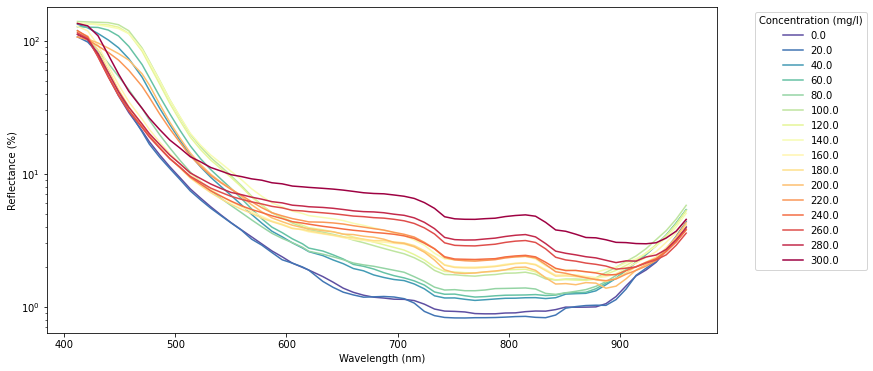

In [11]:
BR.plot_spectral_curve() #plots spectral curve

{'Wave': None, 'Sensor_Angle': None, 'Azimuth': None, 'Altitude': None}


/Users/huiying/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research_Papers/MoCa OBRA/HBMA-OMBRA/preprocessing.py:77: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  upper_tri_train = pd.concat([np.log(X_train[a].div(X_train[b]).rename(f'{a}/{b}')) for a, b in col_combinations], 1)
/Users/huiying/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research_Papers/MoCa OBRA/HBMA-OMBRA/preprocessing.py:78: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  upper_tri_test = pd.concat([np.log(X_test[a].div(X_test[b]).rename(f'{a}/{b}')) for a, b in col_combinations], 1)
/Users/huiying/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research_Papers/MoCa OBRA/HBMA-OMBRA/preprocessing.py:77: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


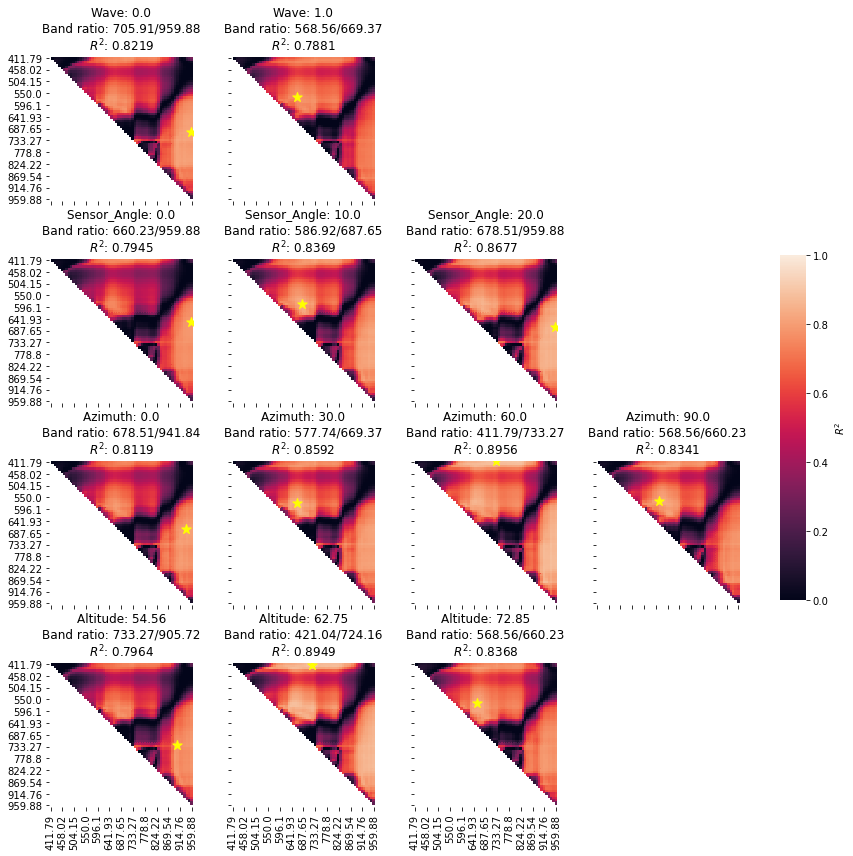

In [12]:
BR.plot_OBRA() #shows the best band ratio selected by OBRA, represented in a heatmap, this may take a while to plot all the OBRA heatmaps under various environmental conditions

Alternatively, a band ratio dataframe has already been prepared, and user can load `tss_band_ratio.csv` instead

In [14]:
TSS_band_ratio = pd.read_csv("data/TSS_band_ratio.csv")
TSS_band_ratio.head()

,Type,Concentration,Wave,Sensor_Angle,Azimuth,Altitude,411.79/421.04,411.79/430.29,411.79/439.54,411.79/448.78,...,923.79/932.82,923.79/941.84,923.79/950.86,923.79/959.88,932.82/941.84,932.82/950.86,932.82/959.88,941.84/950.86,941.84/959.88,950.86/959.88
0,C000_Alt54.56_W0_S00_A00,0.0,0.0,0.0,0.0,54.556047,1.152986,1.539041,2.128738,2.869148,...,0.945524,0.846825,0.750531,0.645938,0.895615,0.793773,0.683154,0.886288,0.762777,0.860642
1,C000_Alt54.56_W0_S00_A30,0.0,0.0,0.0,30.0,54.556047,1.147657,1.498093,2.013836,2.661980,...,0.879600,0.721016,0.591438,0.469349,0.819709,0.672394,0.533594,0.820283,0.650955,0.793574
2,C000_Alt54.56_W0_S00_A60,0.0,0.0,0.0,60.0,54.556047,1.133796,1.484405,2.036494,2.690622,...,0.870103,0.704266,0.574981,0.457712,0.809406,0.660819,0.526043,0.816425,0.649913,0.796047
3,C000_Alt54.56_W0_S00_A90,0.0,0.0,0.0,90.0,54.556047,1.176285,1.612700,2.290529,3.136900,...,0.823747,0.701366,0.567347,0.459227,0.851433,0.688740,0.557485,0.808918,0.654761,0.809428
4,C000_Alt54.56_W0_S10_A00,0.0,0.0,10.0,0.0,54.556047,1.130672,1.497011,2.067573,2.750158,...,0.910653,0.744919,0.605641,0.480331,0.818005,0.665063,0.527458,0.813030,0.644810,0.793095


/Users/huiying/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research_Papers/MoCa OBRA/HBMA-OMBRA/preprocessing.py:216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1],h_pad=0.3) #left bottom right top in normalised (0,1) figure coordinates


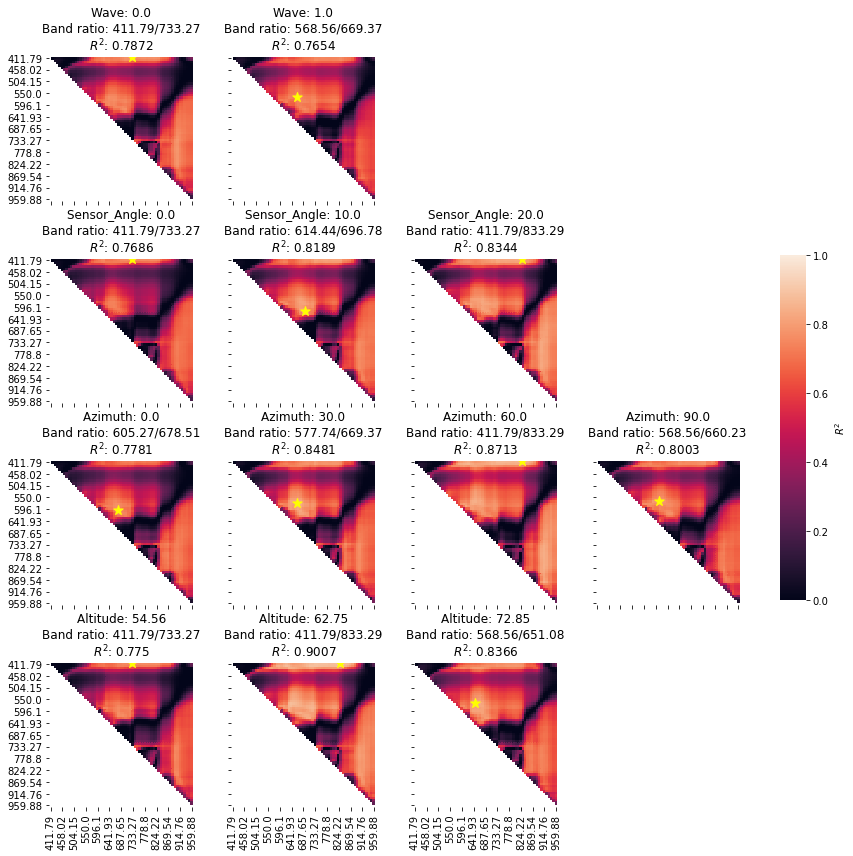

In [15]:
plot_OBRA(TSS_band_ratio,wavelengths)

# ENBRAS
* During the bagging procedure, csv files will be saved to the user's directory
* Alternatively, load the prepared .csv files, which we will be using later in the "Clustering" section
* Generated files may be slightly different from the prepared files since they are sampled randomly

In [ ]:
#initialise conditions
ENB = ENBRAS(df,frac_to_sample=1,n_sample=10) #feel free to change n_sample to any number and observe the change in data distribution

In [ ]:
for test_size in np.arange(0.1,0.55,0.1): #iterate across different test size (0.1,0.2,0.3,0.4,0.5)
    test_size = round(test_size,1)
    ENB.bagging(test_size=test_size,store_directory="output")

# Clustering
With modified Batchelor & Wilkin's algorithm

### Load prepared data

In [22]:
cluster_class = Clustering(prefix = "candidate_BBRs",store_directory="data")

### View the frequency of the candidate BBRs

data/candidate_BBRs_test0.5.csv
data/candidate_BBRs_test0.4.csv
data/candidate_BBRs_test0.1.csv
data/candidate_BBRs_test0.3.csv
data/candidate_BBRs_test0.2.csv


/Users/huiying/anaconda3/envs/machine_learning/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:518: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(self.xlim)


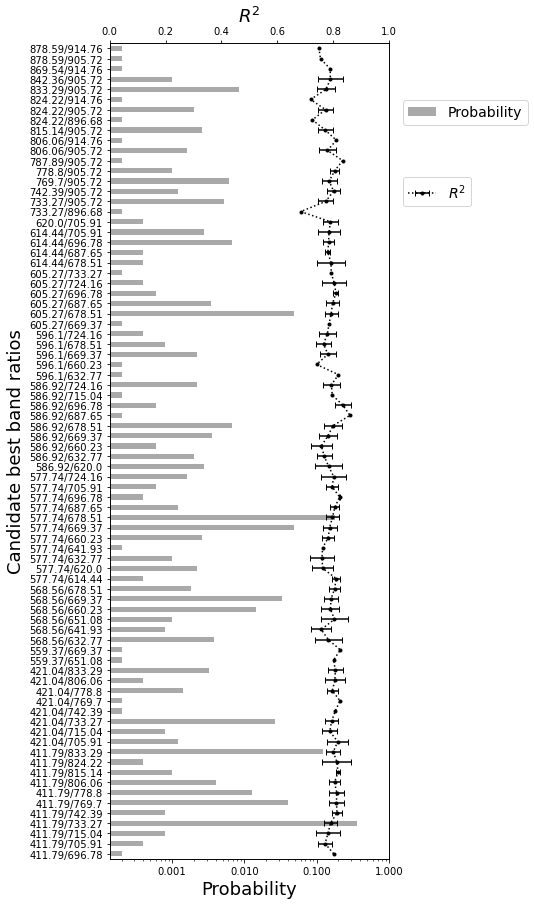

b0      b1        r2                 probability     band_ratio  \
                        mean       std count                              
3   411.79  733.27  0.791043  0.022211  1839      0.3678  411.79/733.27   
33  577.74  678.51  0.798038  0.023031   903      0.1806  577.74/678.51   
10  411.79  833.29  0.800985  0.024844   620      0.1240  411.79/833.29   
53  605.27  678.51  0.793438  0.023865   243      0.0486  605.27/678.51   
32  577.74  669.37  0.787821  0.025444   242      0.0484  577.74/669.37   
..     ...     ...       ...       ...   ...         ...            ...   
20  559.37  669.37  0.826314       NaN     1      0.0002  559.37/669.37   
19  559.37  651.08  0.801936       NaN     1      0.0002  559.37/651.08   
15  421.04  769.70  0.825006       NaN     1      0.0002   421.04/769.7   
14  421.04  742.39  0.808051       NaN     1      0.0002  421.04/742.39   
79  878.59  914.76  0.749449       NaN     1      0.0002  878.59/914.76   

   weight_std count_weighted_std probability_weighted_std weight_std_infl  \
                                                                            
3    0.986981        1815.058809                 0.369688       76.813221   
33   0.986501         890.810160                 0.181439       74.078084   
10   0.985438         610.971834                 0.124442       68.673971   
53   0.986012         239.600954                 0.048801       71.490646   
32   0.985086         238.390895                 0.048555       67.052636   
..        ...                ...                      ...             ...   
20        NaN                NaN                      NaN             NaN   
19        NaN                NaN                      NaN             NaN   
15        NaN                NaN                      NaN             NaN   
14        NaN                NaN                      NaN             NaN   
79        NaN                NaN                      NaN             NaN   

   count_weighted_std_infl probability_weighted_std_infl  
                                                          
3            141259.513406                      0.386131  
33            66892.509561                      0.182850  
10            42577.861782                      0.116386  
53            17372.226956                      0.047487  
32            16226.737993                      0.044356  
..                     ...                           ...  
20                     NaN                           NaN  
19                     NaN                           NaN  
15                     NaN                           NaN  
14                     NaN                           NaN  
79                     NaN                           NaN  

[80 rows x 13 columns]

In [17]:
cluster_class.plot_probability()

### Plot and save the clustering results

data/candidate_BBRs_test0.5.csv
data/candidate_BBRs_test0.4.csv
data/candidate_BBRs_test0.1.csv
data/candidate_BBRs_test0.3.csv
data/candidate_BBRs_test0.2.csv


/Users/huiying/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research_Papers/MoCa OBRA/HBMA-OMBRA/preprocessing.py:602: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


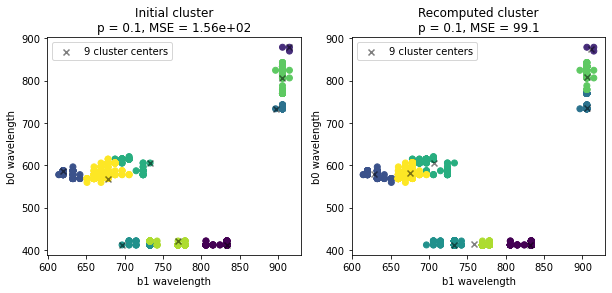

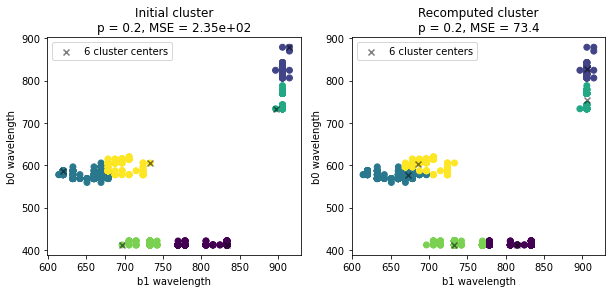

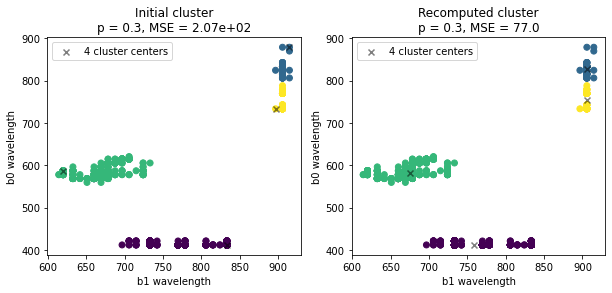

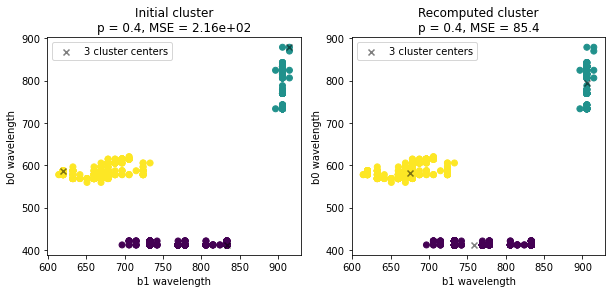

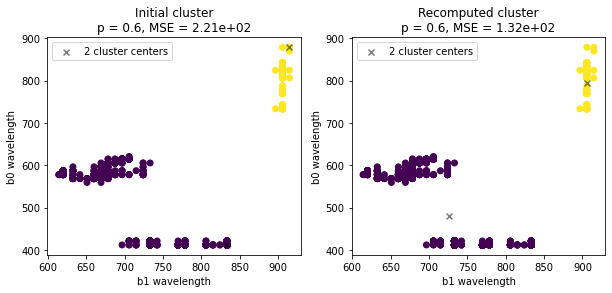

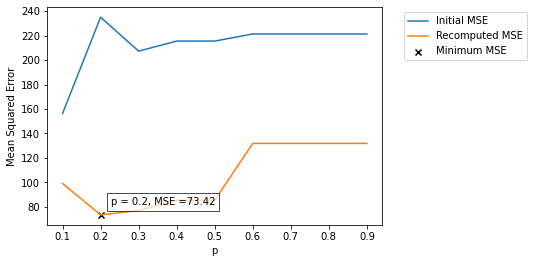

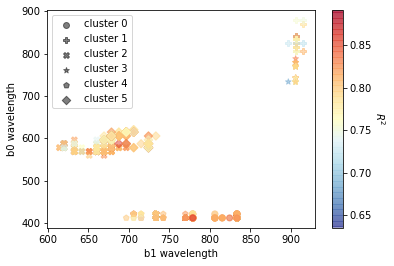

In [23]:
clustered_candidates = cluster_class.plot_cluster()
# at this stage, a csv file with the clustered data will be saved in the output directory

### Analyse the clustered candidate BBRs

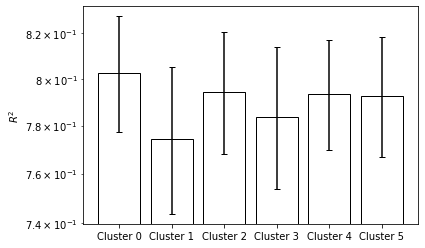

/Users/huiying/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research_Papers/MoCa OBRA/HBMA-OMBRA/preprocessing.py:745: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


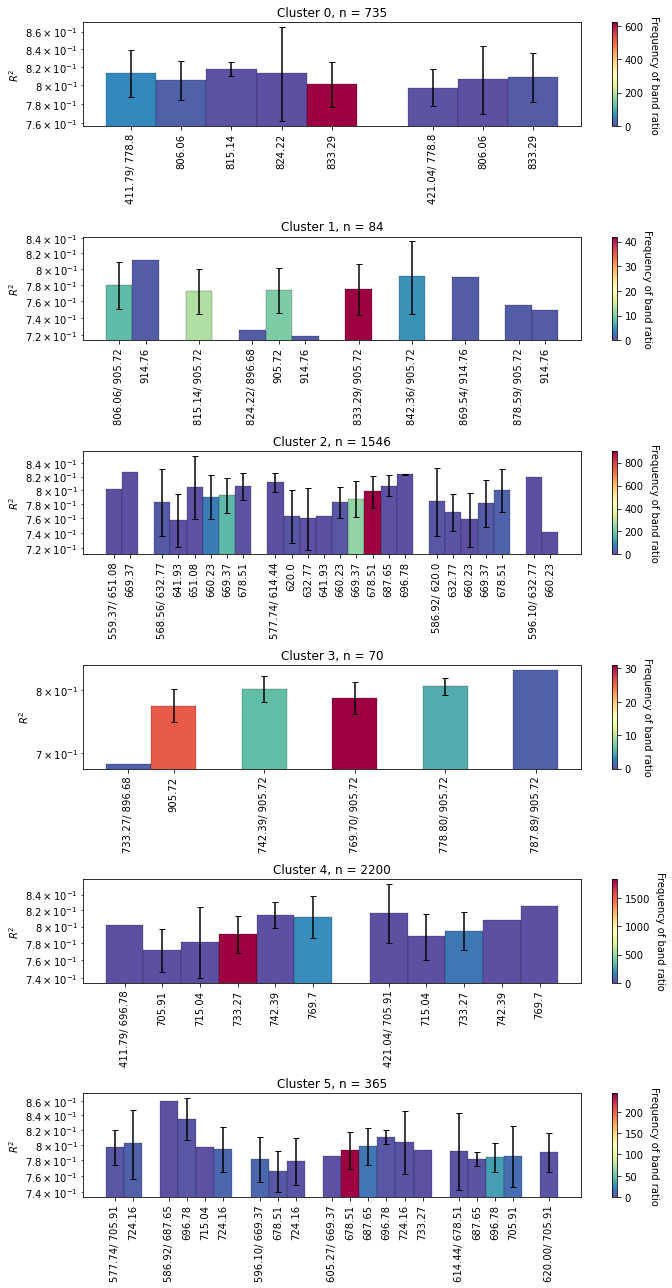

In [24]:
cluster_class.clustered_probability(clustered_candidates)